# Evaluation Project 4 Global Power Plant Database 

# Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants
around the world. It centralizes power plant data to make it easier to navigate, compare and
draw insights for one’s own analysis. The database covers approximately 14,000 power plants
from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear,
biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is
geolocated and entries contain information on plant capacity, generation, ownership, and fuel
type. It will be continuously updated as data becomes available.

# Key attributes of the database
The database includes the following indicators:

 `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3
specification [5]

 `country_long` (text): longer form of the country designation

 `name` (text): name or title of the power plant, generally in Romanized form

 `gppd_idnr` (text): 10 or 12 character identifier for the power plant

 `capacity_mw` (number): electrical generating capacity in megawatts

 `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

 `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

 `primary_fuel` (text): energy source used in primary electricity generation or export

 `other_fuel1` (text): energy source used in electricity generation or export

 `other_fuel2` (text): energy source used in electricity generation or export

 `other_fuel3` (text): energy source used in electricity generation or export

  `commissioning_year` (number): year of plant operation, weighted by unit-capacity
when data is available

 `owner` (text): majority shareholder of the power plant, generally in Romanized form

 `source` (text): entity reporting the data; could be an organization, report, or document,
generally in Romanized form

 `url` (text): web document corresponding to the `source` field

 `geolocation_source` (text): attribution for geolocation information

 `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-
WEPP database.

 `year_of_capacity_data` (number): year the capacity information was reported

 `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for
the year 2013

 `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for
the year 2014

 `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for
the year 2015

 `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for
the year 2016

 `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

 `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for
the year 2018

 `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for
the year 2019

 `generation_data_source` (text): attribution for the reported generation information

 `estimated_generation_gwh_2013` (number): estimated electricity generation in
gigawatt-hours for the year 2013

 `estimated_generation_gwh_2014` (number): estimated electricity generation in
gigawatt-hours for the year 2014 

 `estimated_generation_gwh_2015` (number): estimated electricity generation in
gigawatt-hours for the year 2015 

 `estimated_generation_gwh_2016` (number): estimated electricity generation in
gigawatt-hours for the year 2016 

 `estimated_generation_gwh_2017` (number): estimated electricity generation in
gigawatt-hours for the year 2017 

 &#39;estimated_generation_note_2013` (text): label of the model/method used to estimate
generation for the year 2013

 `estimated_generation_note_2014` (text): label of the model/method used to estimate
generation for the year 2014 

 `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
 `estimated_generation_note_2016` (text): label of the model/method used to estimate
generation for the year 2016

 `estimated_generation_note_2017` (text): label of the model/method used to estimate
generation for the year 2017 

Fuel Type Aggregation

We define the &quot;Fuel Type&quot; attribute of our database based on common fuel categories. 

### Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw


### Importing  reguire libraries 


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

 #### Dataset contain 907 rows and 27 columns
 #### Some of features are object datatype while others are float type.
 

In [5]:
# Data integrity check
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          374
owner                       563
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         461
generation_gwh_2014         503
generation_gwh_2015         479
generation_gwh_2016         467
generation_gwh_2017         461
generation_gwh_2018         454
generation_gwh_2019         906
generation_data_source      453
estimated_generation_gwh    907
dtype: int64

There are so much values missing in the dataset.


### WE are going to drop the columns which has maximum null values because if we are going to fill those data then the prediction will not be correct.

In [6]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2019','estimated_generation_gwh'],axis=1, inplace=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,...,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,...,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,...,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,...,http://www.cea.nic.in/,WRI,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,...,http://www.cea.nic.in/,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,...,http://www.cea.nic.in/,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,...,http://karnatakapower.com,Industry About,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,...,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        374
owner                     563
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       461
generation_gwh_2014       503
generation_gwh_2015       479
generation_gwh_2016       467
generation_gwh_2017       461
generation_gwh_2018       454
generation_data_source    453
dtype: int64

### Removing non- relevent columns


In [8]:
df.drop(['country','country_long','url','year_of_capacity_data','gppd_idnr','owner','name'],axis=1,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,1.92500,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,2.05400,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [10]:
# Filling geolocation_source with mode because of categorical data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)


In [11]:
# filling null values with median in numerical columns
df.fillna(df.median()[0],inplace =True)

In [12]:
df.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Here we can see that there are no null values.

In [13]:
df['source'].nunique()

191

In [14]:
df['geolocation_source'].nunique()

3

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   commissioning_year      907 non-null    float64
 5   source                  907 non-null    object 
 6   geolocation_source      907 non-null    object 
 7   generation_gwh_2013     907 non-null    float64
 8   generation_gwh_2014     907 non-null    float64
 9   generation_gwh_2015     907 non-null    float64
 10  generation_gwh_2016     907 non-null    float64
 11  generation_gwh_2017     907 non-null    float64
 12  generation_gwh_2018     907 non-null    float64
 13  generation_data_source  907 non-null    object 
dtypes: float64(10), object(4)
memory usage: 99

<Axes: xlabel='primary_fuel', ylabel='count'>

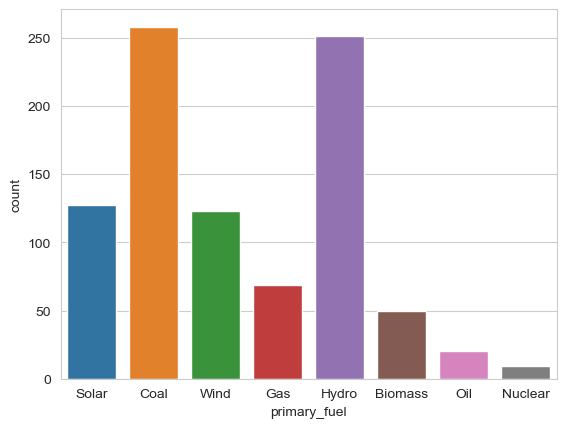

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='primary_fuel',data=df)

# EDA

In [17]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.20000,59.200000,59.200,59.200000,59.200000,59.200000,59.2
1,98.0,24.7663,74.6090,Coal,59.2,Ultratech Cement ltd,WRI,59.20000,59.200000,59.200,59.200000,59.200000,59.200000,59.2
2,39.2,21.9038,69.3732,Wind,59.2,CDM,WRI,59.20000,59.200000,59.200,59.200000,59.200000,59.200000,59.2
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,59.20000,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [18]:
df_corr= df.corr()
df_corr

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,-0.053917,0.216974,0.408949,-0.039177,0.813630,0.840710,0.874062,0.891339,0.903325
latitude,-0.053917,1.000000,-0.500920,0.083863,0.021374,-0.030295,-0.030930,-0.031664,-0.025103,-0.029062
longitude,0.216974,-0.500920,1.000000,0.289883,0.022542,0.160083,0.169968,0.185303,0.198487,0.197932
commissioning_year,0.408949,0.083863,0.289883,1.000000,0.004751,0.302435,0.301925,0.311325,0.320488,0.322677
generation_gwh_2013,-0.039177,0.021374,0.022542,0.004751,1.000000,-0.018062,-0.019680,-0.019895,-0.022135,-0.020055
generation_gwh_2014,0.813630,-0.030295,0.160083,0.302435,-0.018062,1.000000,0.966640,0.937024,0.906582,0.897903
generation_gwh_2015,0.840710,-0.030930,0.169968,0.301925,-0.019680,0.966640,1.000000,0.973859,0.942866,0.935726
generation_gwh_2016,0.874062,-0.031664,0.185303,0.311325,-0.019895,0.937024,0.973859,1.000000,0.976302,0.967416
generation_gwh_2017,0.891339,-0.025103,0.198487,0.320488,-0.022135,0.906582,0.942866,0.976302,1.000000,0.987883
generation_gwh_2018,0.903325,-0.029062,0.197932,0.322677,-0.020055,0.897903,0.935726,0.967416,0.987883,1.000000


<Axes: >

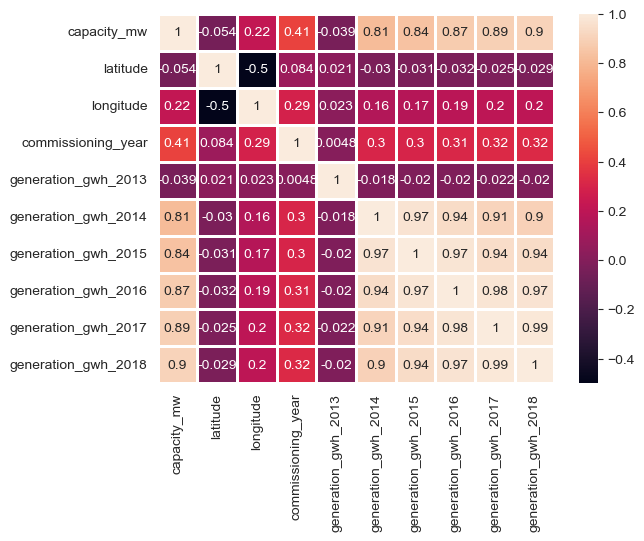

In [19]:
sns.heatmap(df_corr,annot=True,linewidth=1)

Here we can notice that generatiom_gwh_2013 is negatively correlated with capacity_mv and latitude,but generation_gwh_2014,..2015,...2016,...2017,....2018 are positively correlated with both capacity_mv and latitude.

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

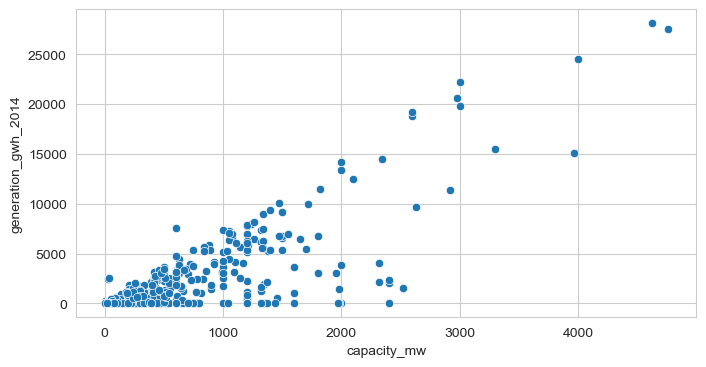

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)


Here, we can see that as the electricity generation in gigawatt-hour is increasing also increasing the no of electrical generating capacity in megawatts in 2014.

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

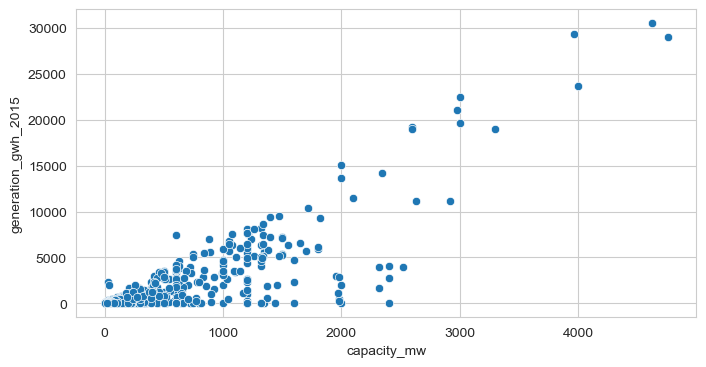

In [21]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)


<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

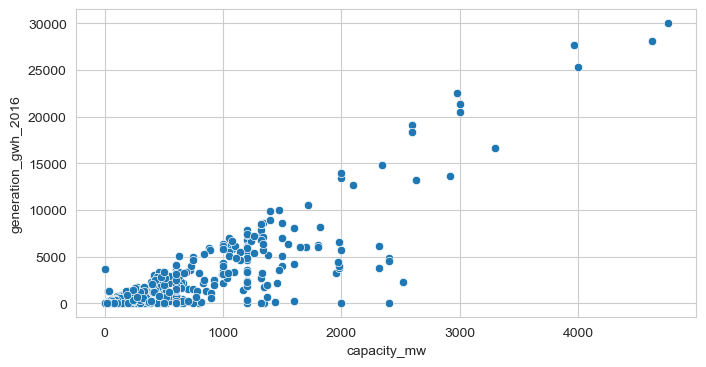

In [22]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)


<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

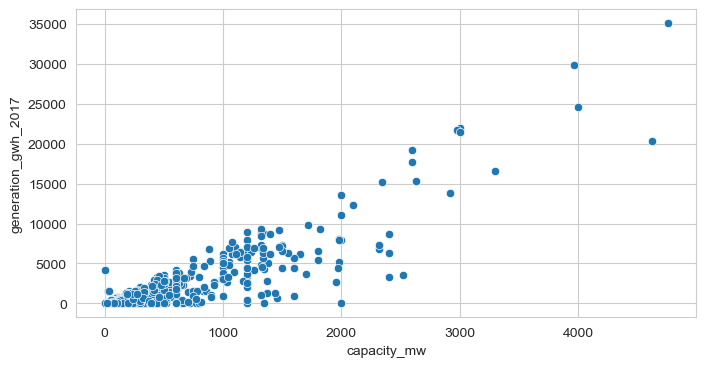

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)


<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2018'>

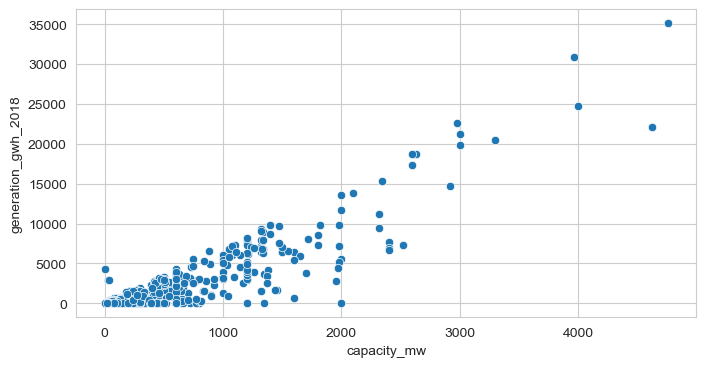

In [24]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)


Here, we can see that as the electricity generation in gigawatt-hour is increasing also increasing the no of electrical generating capacty in megawatts in 2015,2016,2017,2018. 

<Axes: xlabel='capacity_mw', ylabel='latitude'>

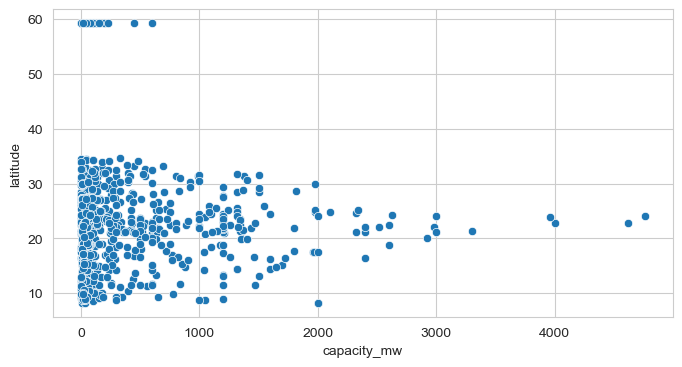

In [25]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

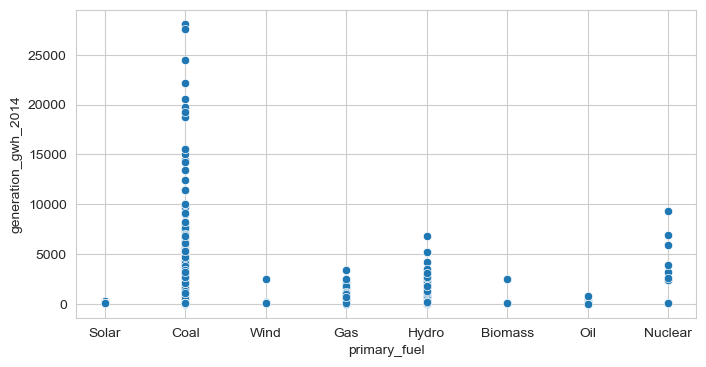

In [26]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)


<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

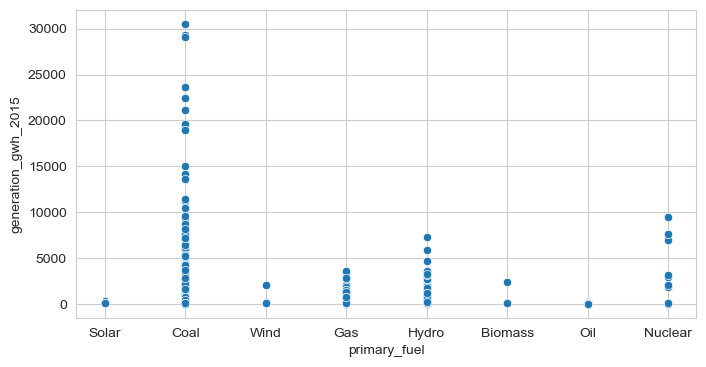

In [27]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)


<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

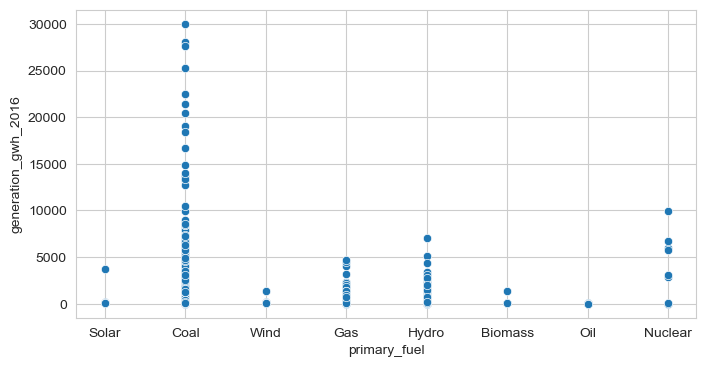

In [28]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)


<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

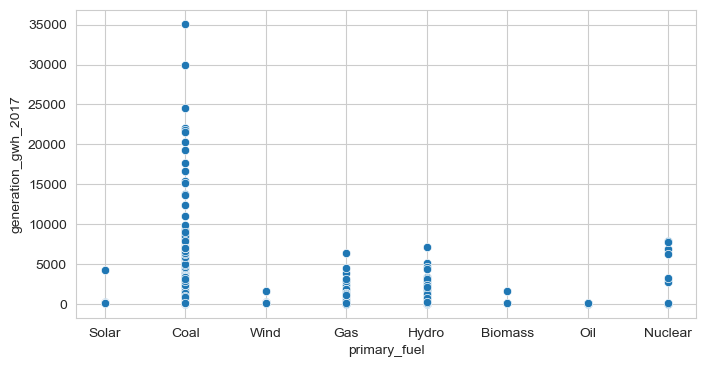

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)


<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2018'>

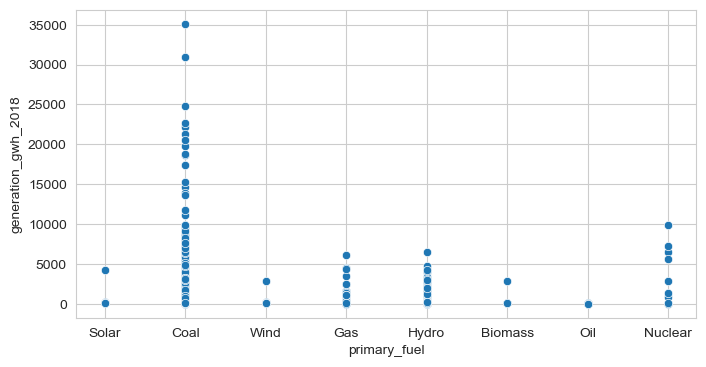

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=df)


From here we can notice that in all of the years from 2014 to 2018 most frquently used fuel is coal while Nuclear, gas and Hydro are on average use whereas Solar,Wind, Bomass and Oil are very less used.

<Axes: xlabel='primary_fuel', ylabel='latitude'>

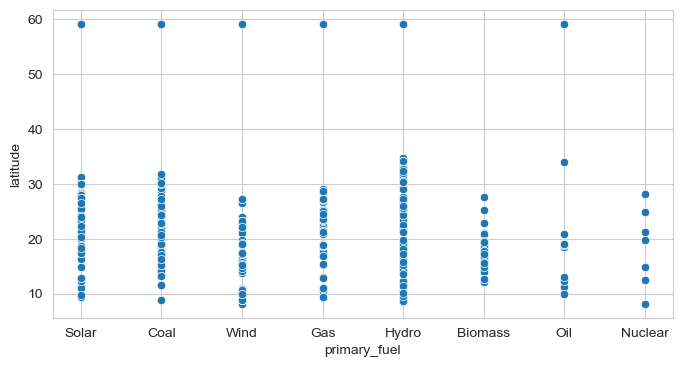

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)


<Axes: xlabel='capacity_mw', ylabel='primary_fuel'>

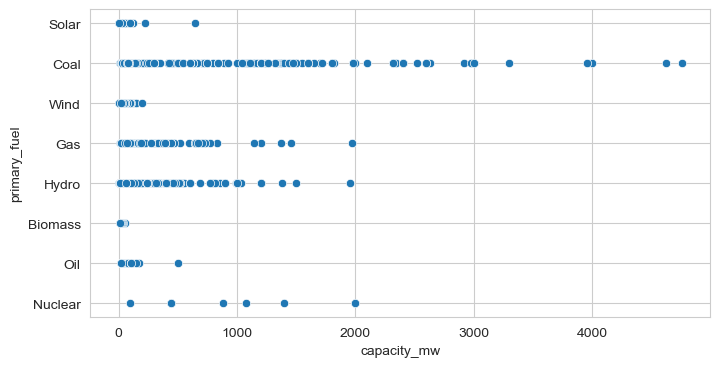

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)


From here we can see that coal has maximum electrical generating capacity in megawatts.

### Using LabelEncoder for converting categorical to numerical

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   commissioning_year      907 non-null    float64
 5   source                  907 non-null    object 
 6   geolocation_source      907 non-null    object 
 7   generation_gwh_2013     907 non-null    float64
 8   generation_gwh_2014     907 non-null    float64
 9   generation_gwh_2015     907 non-null    float64
 10  generation_gwh_2016     907 non-null    float64
 11  generation_gwh_2017     907 non-null    float64
 12  generation_gwh_2018     907 non-null    float64
 13  generation_data_source  907 non-null    object 
dtypes: float64(10), object(4)
memory usage: 99

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [36]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [37]:
encoder=LabelEncoder()
df['primary_fuel']=encoder.fit_transform(df['primary_fuel'])
df['geolocation_source']=encoder.fit_transform(df['geolocation_source'])
df['source']=encoder.fit_transform(df['source'])
#df['generation_data_source']=encoder.fit_transform(df['generation_data_source'])


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    int32  
 4   commissioning_year      907 non-null    float64
 5   source                  907 non-null    int32  
 6   geolocation_source      907 non-null    int32  
 7   generation_gwh_2013     907 non-null    float64
 8   generation_gwh_2014     907 non-null    float64
 9   generation_gwh_2015     907 non-null    float64
 10  generation_gwh_2016     907 non-null    float64
 11  generation_gwh_2017     907 non-null    float64
 12  generation_gwh_2018     907 non-null    float64
 13  generation_data_source  907 non-null    object 
dtypes: float64(10), int32(3), object(1)
memory

In [39]:
df['generation_data_source'].unique()

array([59.2, 'Central Electricity Authority'], dtype=object)

In [40]:
df.drop('generation_data_source',axis=1,inplace=True)

In [41]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2013  907 non-null    float64
 8   generation_gwh_2014  907 non-null    float64
 9   generation_gwh_2015  907 non-null    float64
 10  generation_gwh_2016  907 non-null    float64
 11  generation_gwh_2017  907 non-null    float64
 12  generation_gwh_2018  907 non-null    float64
dtypes: float64(10), int32(3)
memory usage: 81.6 KB


Now all columns are converted into numerical.

# Z Score

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  87, 135, 143, 143, 143, 143, 143, 143,
       147, 158, 209, 209, 209, 209, 209, 209, 262, 308, 308, 308, 308,
       308, 308, 363, 364, 364, 364, 364, 364, 364, 375, 447, 482, 493,
       493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 519, 532,
       623, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 657,
       695, 695, 695, 695, 695, 695, 718, 721, 721, 721, 721, 721, 724,
       724, 724, 724, 724, 726, 726, 726, 726, 726, 726, 765, 767, 786,
       786, 786, 786, 786, 786, 788, 808, 808, 808, 808, 808, 808, 855,
       879, 880, 880, 880, 880, 880, 880, 884], dtype=int64), array([2, 3, 4, 5, 6, 0, 0, 1, 2, 3, 4, 5, 6, 6, 1, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 6, 1, 2, 3, 4, 5, 6, 6, 0, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 0, 1, 1, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6,
       0, 6, 1, 2, 3, 4, 5, 6, 6, 1, 2, 3, 4, 5, 6, 0, 0, 1, 2, 3, 4,

In [44]:
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
threshold=3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (907, 13)
Shape of the dataframe after removing outliers:  (872, 13)
Percentage of data loss post outlier removal:  3.8588754134509373


In [45]:
df.shape

(872, 13)

# Skewness Handling

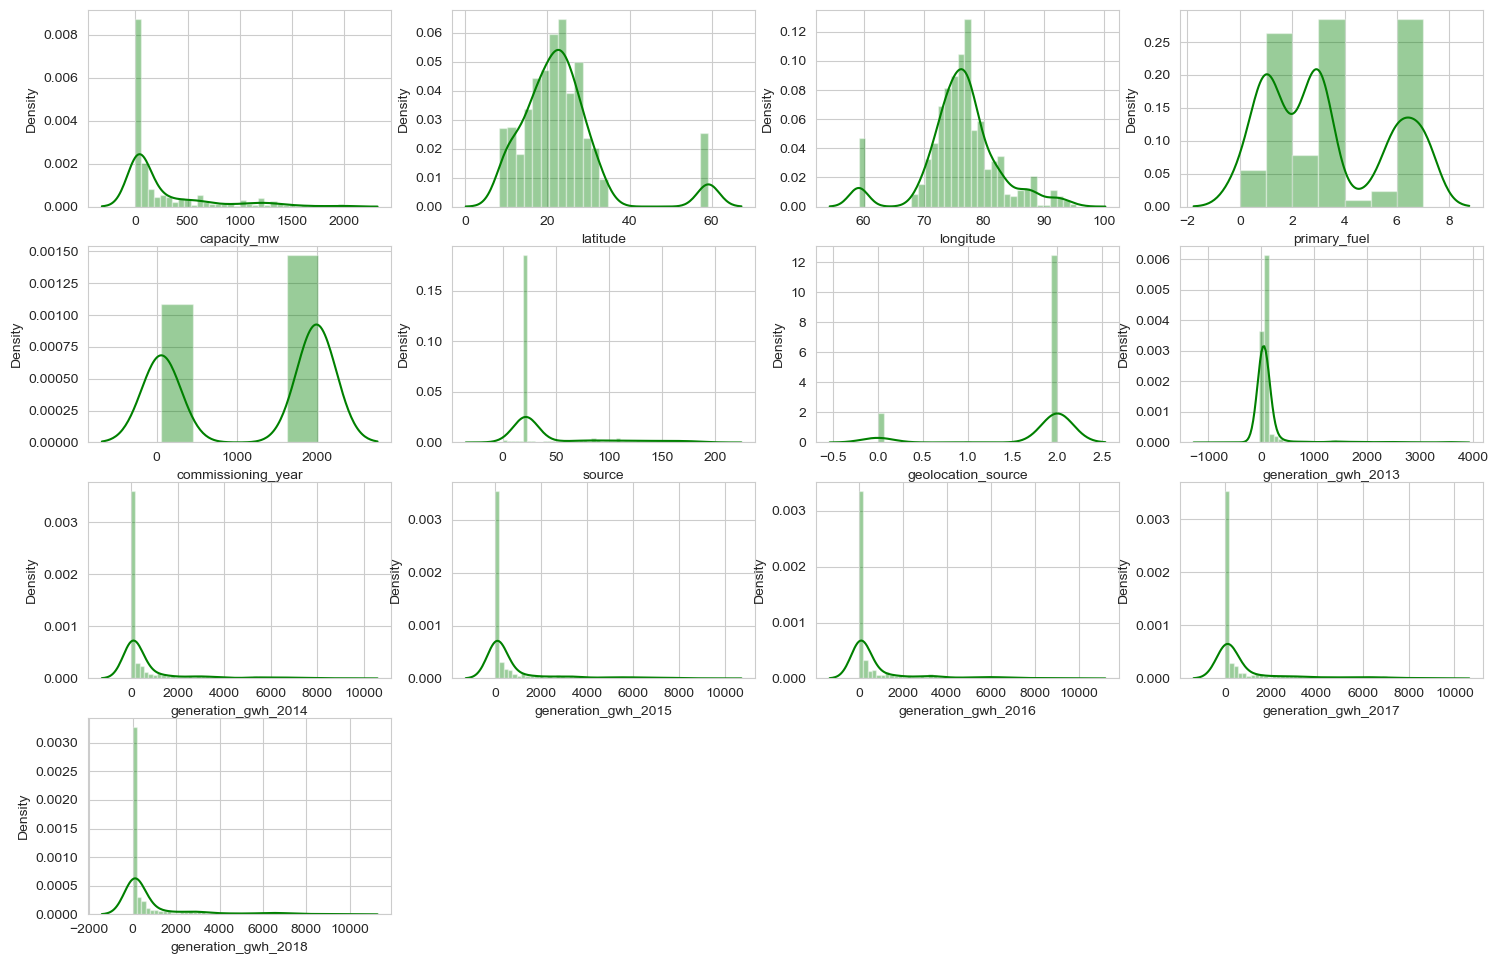

In [46]:
plt.figure(figsize=(18,24))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [47]:
df.skew()

capacity_mw            2.045057
latitude               1.923177
longitude             -0.291232
primary_fuel           0.423478
commissioning_year    -0.306237
source                 1.782257
geolocation_source    -2.093441
generation_gwh_2013    5.292559
generation_gwh_2014    2.870849
generation_gwh_2015    2.702937
generation_gwh_2016    2.630682
generation_gwh_2017    2.539093
generation_gwh_2018    2.585727
dtype: float64

Skewness more than +/- 0.5 will be treated

Object columns will not be treated.

In [48]:
from sklearn.preprocessing import power_transform

In [49]:
df[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=power_transform(df[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])


In [50]:
df.skew()

capacity_mw            0.016763
latitude               1.923177
longitude             -0.291232
primary_fuel           0.423478
commissioning_year    -0.306237
source                 1.782257
geolocation_source    -2.093441
generation_gwh_2013   -0.017776
generation_gwh_2014   -0.016997
generation_gwh_2015   -0.015270
generation_gwh_2016   -0.010386
generation_gwh_2017   -0.005460
generation_gwh_2018   -0.000411
dtype: float64

# First taking capacity_mw as target variable and making regression model

### Dividing data in to x and y

In [51]:
x=df.drop(['capacity_mw'], axis=1)
y=df['capacity_mw']

In [52]:
x.shape

(872, 12)

In [53]:
y.shape

(872,)

## Scaling x values

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)


In [55]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [56]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,0.293023,0.475757,0.467726,0.569442,0.233679,0.861239,0.677529,0.570573,0.573383,0.568417,0.566347,0.550685
std,0.204013,0.172453,0.325847,0.489203,0.236739,0.344232,0.049482,0.195890,0.198411,0.202481,0.210066,0.215256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.171754,0.400875,0.142857,0.000000,0.115789,1.000000,0.663766,0.480225,0.481237,0.471523,0.465258,0.447027
50%,0.273419,0.475443,0.428571,0.978558,0.115789,1.000000,0.671147,0.480225,0.481237,0.471523,0.465258,0.447027
75%,0.365138,0.549988,0.857143,0.992342,0.190789,1.000000,0.671147,0.698130,0.707429,0.700877,0.705354,0.695407
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

### Linear Regression

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


## Checking the best Random State for Data Split

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr= LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    lr_predict_train=lr.predict(x_train)
    lr_predict_test=lr.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,lr_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,lr_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.6168753214490523
At random state 0, The test accuracy is: 0.5330081861282279


At random state 1, The training accuracy is: 0.5889173586257426
At random state 1, The test accuracy is: 0.6518787158707491


At random state 2, The training accuracy is: 0.6063060419432321
At random state 2, The test accuracy is: 0.5811852146246024


At random state 3, The training accuracy is: 0.6043308955718278
At random state 3, The test accuracy is: 0.5898647313021451


At random state 4, The training accuracy is: 0.603651658728769
At random state 4, The test accuracy is: 0.5935916614786756


At random state 5, The training accuracy is: 0.5799253744123436
At random state 5, The test accuracy is: 0.6852530832312992


At random state 6, The training accuracy is: 0.5970269702816153
At random state 6, The test accuracy is: 0.606814096334772


At random state 7, The training accuracy is: 0.5972910859753722
At random state 7, The test accuracy is: 0.6204232225399

## Spliting the data with Random state= 95

In [60]:
# Spliting the data into 73% training and 27% testing
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.27,random_state=95)

In [61]:
x_train.shape

(636, 12)

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.6242420372430678


In [63]:
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))

MSE: 0.4432647875657471
MAE: 0.5338254695863013
r2_score: 0.17242049273839255


# Ridge

In [64]:
from sklearn.linear_model import Ridge
rg=Ridge()
rg.fit(x_train,y_train)
print(rg.score(x_train,y_train))
rg_predict=rg.predict(x_test)

0.6236968099105211


In [65]:
print('MSE:',mean_squared_error(rg_predict,y_test))
print('MAE:',mean_absolute_error(rg_predict,y_test))
print('r2_score:',r2_score(rg_predict,y_test))

MSE: 0.43895447396123066
MAE: 0.5335073551246778
r2_score: 0.1627696663077819


# SVR

In [66]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)


0.588504504301569


In [67]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.4552804943535804
MAE: 0.5020290892360908
r2_score: 0.293862981180085


In [68]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)


0.8073169082297611


In [69]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 0.26695121170208647
MAE: 0.3765280570384848
r2_score: 0.6574154246868904


In [70]:
# Kernel='rbf'
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.8037187049569229


In [71]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.23536944332210766
MAE: 0.3421743173025356
r2_score: 0.6583670116724214


## RandomForestRegressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
rf_pred= rf.predict(x_test)

0.9676165252109385


In [74]:
print('MSE:',mean_squared_error(rf_pred,y_test))
print('MAE:',mean_absolute_error(rf_pred,y_test))
print('r2_score:',r2_score(rf_pred,y_test))

MSE: 0.22534368788231565
MAE: 0.32396380678192765
r2_score: 0.7165657966047116


## DecisionTreeRegressor

In [75]:
from sklearn.tree import DecisionTreeRegressor


In [76]:
dtr= DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print(dtr.score(x_train,y_train))
dtr_pred=dtr.predict(x_test)

0.9953341828048381


In [77]:
print('MSE:',mean_squared_error(dtr_pred,y_test))
print('MAE:',mean_absolute_error(dtr_pred,y_test))
print('r2_score:',r2_score(dtr_pred,y_test))

MSE: 0.3684481022716647
MAE: 0.41527861826674034
r2_score: 0.6086491517759143


## GradientBoostingRegressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
gbr_pred=gbr.predict(x_test)

0.8984048473123473


In [80]:
print('MSE:',mean_squared_error(gbr_pred,y_test))
print('MAE:',mean_absolute_error(gbr_pred,y_test))
print('r2_score:',r2_score(gbr_pred,y_test))

MSE: 0.20644299048436052
MAE: 0.3221267838227591
r2_score: 0.7308452124383749


## Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
np.random.seed(10)
def rmse_cv(model,x,y):
    rmse=- (cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10))
    return(rmse)

models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['lr','rg','svr','svr_p','svr_r','rf','dtr','gbr']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

lr    : 0.417156, 0.063289
rg    : 0.413682, 0.063881
svr    : 0.477540, 0.080276
svr_p    : 0.260537, 0.046864
svr_r    : 0.240200, 0.056887
rf    : 0.227880, 0.089713
dtr    : 0.365534, 0.109791
gbr    : 0.220952, 0.073537


 According to all metrics score selecting the GradientBoostingRegressor.

## Saving The Model

In [87]:
import joblib

In [133]:
joblib.dump(gbr,'Global_power_plant_Regression_Model.obj')

['Global_power_plant_Regression_Model.obj']

## Taking 'primary_fuel' as target variable and making classification model

### Dividing data into x and y

In [90]:
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']

In [91]:
x.shape

(872, 12)

In [92]:
y.shape

(872,)

## Spliting train and test data

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

# Model Building

In [100]:
# importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')



## LogisticRegression

In [101]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print('Cross Validation Score:',np.mean(logreg_score))

Cross Validation Score: 0.532111658456486


In [104]:
logreg.fit(x_train,y_train)
logreg_predicted=logreg.predict(x_test)
print(accuracy_score(y_test,logreg_predicted))
print(confusion_matrix(y_test,logreg_predicted))
print(classification_report(y_test,logreg_predicted))
print('Training Score:', logreg.score(x_train,y_train))
print('Test Score:', logreg.score(x_test,y_test))

0.5169491525423728
[[ 0  2  0  0  0  0 10  2]
 [ 0 11  0 27  0  0 15  3]
 [ 0  6  0 14  0  0  2  1]
 [ 0 14  0 58  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  6  0  0  2  1]
 [ 0  1  0  0  0  0 22  6]
 [ 0  0  0  1  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.32      0.20      0.24        56
           2       0.00      0.00      0.00        23
           3       0.54      0.81      0.65        72
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         9
           6       0.43      0.76      0.55        29
           7       0.70      0.97      0.82        32

    accuracy                           0.52       236
   macro avg       0.25      0.34      0.28       236
weighted avg       0.39      0.52      0.43       236

Training Score: 0.5534591194968553
Test Score: 0.5169491525423728


## DecisionTreeClassifier

In [106]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print('Cross Validation Score:', np.mean(dtc_score))

Cross Validation Score: 0.7752052545155994


In [107]:
dtc.fit(x_train,y_train)
dtc_predicted=dtc.predict(x_test)
print(accuracy_score(y_test,dtc_predicted))
print(confusion_matrix(y_test,dtc_predicted))
print(classification_report(y_test,dtc_predicted))
print('Training Score:', dtc.score(x_train,y_train))
print('Test Score:', dtc.score(x_test,y_test))

0.8177966101694916
[[13  0  1  0  0  0  0  0]
 [ 5 41  5  2  1  2  0  0]
 [ 0  6  8  8  0  1  0  0]
 [ 0  5  2 65  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  2  1  1  0  5  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.75      0.73      0.74        56
           2       0.47      0.35      0.40        23
           3       0.86      0.90      0.88        72
           4       0.00      0.00      0.00         1
           5       0.62      0.56      0.59         9
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        32

    accuracy                           0.82       236
   macro avg       0.68      0.68      0.68       236
weighted avg       0.81      0.82      0.81       236

Training Score: 1.0
Test Score: 0.8177966101694916


## KNeighborsClassfier

In [108]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print('Cross Validation Score:', np.mean(knn_score))

Cross Validation Score: 0.7316256157635468


In [109]:
knn.fit(x_train,y_train)
knn_predicted=knn.predict(x_test)
print(accuracy_score(y_test,knn_predicted))
print(confusion_matrix(y_test,knn_predicted))
print(classification_report(y_test,knn_predicted))
print('Training Score:', knn.score(x_train,y_train))
print('Test Score:', knn.score(x_test,y_test))

0.6610169491525424
[[ 8  3  0  0  0  0  3  0]
 [ 6 31  7  9  0  0  3  0]
 [ 2  5  7  8  0  0  0  1]
 [ 0  7  6 59  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 1  0  1  5  0  0  1  1]
 [ 2  6  0  0  0  0 20  1]
 [ 0  1  0  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.42      0.57      0.48        14
           1       0.58      0.55      0.57        56
           2       0.33      0.30      0.32        23
           3       0.72      0.82      0.77        72
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         9
           6       0.74      0.69      0.71        29
           7       0.91      0.97      0.94        32

    accuracy                           0.66       236
   macro avg       0.46      0.49      0.47       236
weighted avg       0.63      0.66      0.64       236

Training Score: 0.8176100628930818
Test Score: 0.6610169491525424


## RandomForestClassifier

In [111]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print('Cross Validation Score:', np.mean(rfc_score))

Cross Validation Score: 0.8406305418719212


In [112]:
rfc.fit(x_train,y_train)
rfc_predicted=rfc.predict(x_test)
print(accuracy_score(y_test,rfc_predicted))
print(confusion_matrix(y_test,rfc_predicted))
print(classification_report(y_test,rfc_predicted))
print('Training Score:', rfc.score(x_train,y_train))
print('Test Score:', rfc.score(x_test,y_test))

0.8559322033898306
[[13  1  0  0  0  0  0  0]
 [ 4 49  0  2  0  1  0  0]
 [ 0  7  7  8  0  1  0  0]
 [ 0  5  0 67  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  3  1  0  5  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.78      0.88      0.82        56
           2       0.70      0.30      0.42        23
           3       0.86      0.93      0.89        72
           4       0.00      0.00      0.00         1
           5       0.71      0.56      0.63         9
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        32

    accuracy                           0.86       236
   macro avg       0.73      0.70      0.70       236
weighted avg       0.85      0.86      0.84       236

Training Score: 1.0
Test Score: 0.8559322033898306


## AdaBoostClassifier

In [113]:
abc=AdaBoostClassifier()
abc_score=cross_val_score(abc,x,y,cv=5,scoring='accuracy')
print('Cross Validation Score:', np.mean(abc_score))


Cross Validation Score: 0.47136945812807884


In [114]:
abc.fit(x_train,y_train)
abc_predicted=abc.predict(x_test)
print(accuracy_score(y_test,abc_predicted))
print(confusion_matrix(y_test,abc_predicted))
print(classification_report(y_test,abc_predicted))
print('Training Score:', abc.score(x_train,y_train))
print('Test Score:', abc.score(x_test,y_test))

0.3559322033898305
[[ 0 14  0  0  0  0  0  0]
 [ 0 54  0  2  0  0  0  0]
 [ 0 23  0  0  0  0  0  0]
 [ 0 71  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  8  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0 32  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.27      0.96      0.42        56
           2       0.00      0.00      0.00        23
           3       0.25      0.01      0.03        72
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         9
           6       1.00      1.00      1.00        29
           7       0.00      0.00      0.00        32

    accuracy                           0.36       236
   macro avg       0.19      0.25      0.18       236
weighted avg       0.26      0.36      0.23       236

Training Score: 0.44339622641509435
Test Score: 0.3559322033898305


## BaggingClassifier

In [115]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=5,scoring='accuracy')
print('Cross Validation Score:', np.mean(bgc_score))


Cross Validation Score: 0.8257142857142856


In [116]:
bgc.fit(x_train,y_train)
bgc_predicted=bgc.predict(x_test)
print(accuracy_score(y_test,bgc_predicted))
print(confusion_matrix(y_test,bgc_predicted))
print(classification_report(y_test,bgc_predicted))
print('Training Score:', bgc.score(x_train,y_train))
print('Test Score:', bgc.score(x_test,y_test))

0.8347457627118644
[[13  1  0  0  0  0  0  0]
 [ 3 45  3  3  1  1  0  0]
 [ 0  8  7  6  0  2  0  0]
 [ 0  6  0 66  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  2  0  1  0  5  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.71      0.80      0.76        56
           2       0.70      0.30      0.42        23
           3       0.87      0.92      0.89        72
           4       0.00      0.00      0.00         1
           5       0.62      0.56      0.59         9
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        32

    accuracy                           0.83       236
   macro avg       0.71      0.69      0.69       236
weighted avg       0.83      0.83      0.82       236

Training Score: 0.9811320754716981
Test Score: 0.8347457627118644


## GradientBoostingClassifier

In [117]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=5,scoring='accuracy')
print('Cross Validation Score:', np.mean(grbc_score))


Cross Validation Score: 0.8532216748768473


In [118]:
grbc.fit(x_train,y_train)
grbc_predicted=grbc.predict(x_test)
print(accuracy_score(y_test,grbc_predicted))
print(confusion_matrix(y_test,grbc_predicted))
print(classification_report(y_test,grbc_predicted))
print('Training Score:', grbc.score(x_train,y_train))
print('Test Score:', grbc.score(x_test,y_test))

0.8432203389830508
[[11  1  2  0  0  0  0  0]
 [ 3 48  2  1  1  1  0  0]
 [ 0  6 10  5  0  2  0  0]
 [ 0  5  1 66  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  3  3  0  3  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.79      0.86      0.82        56
           2       0.56      0.43      0.49        23
           3       0.88      0.92      0.90        72
           4       0.00      0.00      0.00         1
           5       0.50      0.33      0.40         9
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        32

    accuracy                           0.84       236
   macro avg       0.69      0.67      0.67       236
weighted avg       0.83      0.84      0.84       236

Training Score: 1.0
Test Score: 0.8432203389830508


We select RandomForestClassifier as final model for Hyper Parameter Tunning

## Hyper Parameter Tunning

In [120]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [121]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [122]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print('Accuracy after parameter tunning:',accuracy_score(y_test,rfc_pred))


Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tunning: 0.8432203389830508


In [123]:
rfc_grid.best_params_

{'criterion': 'entropy',
 'min_samples_split': 3,
 'n_estimators': 200,
 'random_state': 10}

## Model Training With Best Parameters

In [124]:
best_param={
    'criterion' : ['entropy'],
    'n_estimators':[200],
    'min_samples_split':[3],
     'random_state':[10]    }

In [126]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [129]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print('Accuracy After Parameter Tunning:',accuracy_score(y_test,best_rfc_pred))


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy After Parameter Tunning: 0.8432203389830508


## Classification Report Of RandomForestClassifier

In [131]:
print('Classification Report:' , classification_report(y_test,best_rfc_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       0.78      0.88      0.82        56
           2       0.71      0.22      0.33        23
           3       0.85      0.92      0.88        72
           4       0.00      0.00      0.00         1
           5       0.50      0.44      0.47         9
           6       0.97      1.00      0.98        29
           7       0.97      1.00      0.98        32

    accuracy                           0.84       236
   macro avg       0.70      0.68      0.67       236
weighted avg       0.83      0.84      0.82       236



## Saving Model

In [132]:
import joblib

In [136]:
joblib.dump(best_rfc_grid.best_estimator_, 'Global_Power_Plant_Database_Classification_Model.obj')

['Global_Power_Plant_Database_Classification_Model.obj']